In [1]:
# Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

# Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
# Plot bar charts showing impact of employee salaries on retention
# Plot bar charts showing corelation between department and employee retention
# Now build logistic regression model using variables that were narrowed down in step 1
# Measure the accuracy of the model

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import  confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier
data=pd.read_csv(r"C:\Users\samir\Downloads\archive (2)\HR_comma_sep.csv")

In [2]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# abs(data.corr()["left"])

In [4]:




lable=LabelEncoder()
data['Department']=lable.fit_transform(data['Department'])
data['salary']=lable.fit_transform(data['salary'])



In [5]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [6]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [7]:
x= pd.crosstab(data['salary'],data['left'])

In [8]:
x

left,0,1
salary,,
0,1155,82
1,5144,2172
2,5129,1317


<Axes: xlabel='salary'>

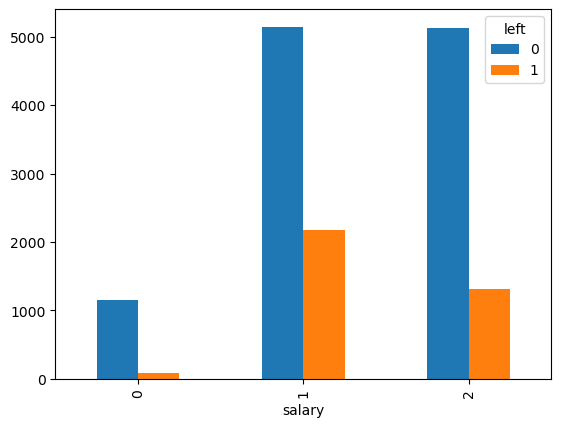

In [9]:
x.plot(kind='bar')

In [10]:
y=pd.crosstab(data['Department'],data['left'])

In [11]:
y

left,0,1
Department,,
0,954,273
1,666,121
2,563,204
3,524,215
4,539,91
5,655,203
6,704,198
7,3126,1014
8,1674,555


<Axes: xlabel='Department'>

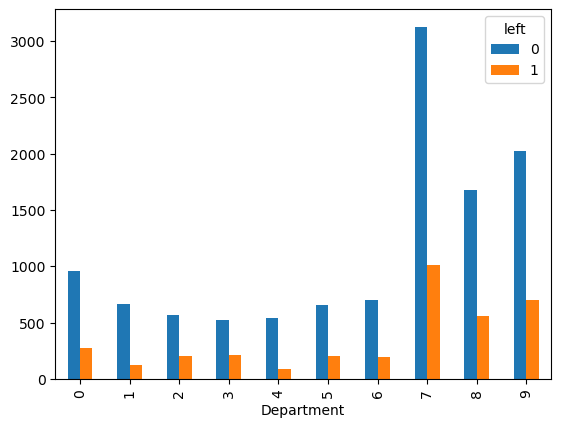

In [12]:
y.plot(kind='bar')

In [13]:
data.corr(numeric_only=True)["left"].apply(lambda x:abs(x)).sort_values(ascending=False)



left                     1.000000
satisfaction_level       0.388375
Work_accident            0.154622
time_spend_company       0.144822
average_montly_hours     0.071287
promotion_last_5years    0.061788
Department               0.032105
number_project           0.023787
last_evaluation          0.006567
salary                   0.001294
Name: left, dtype: float64

In [14]:
data.corr(numeric_only=True)["left"].sort_values(ascending=False)


left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
Department               0.032105
number_project           0.023787
last_evaluation          0.006567
salary                  -0.001294
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64

# i will take this features
#satisfaction_level       
#Work_accident           
#time_spend_company       
#average_montly_hours  

In [15]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [16]:
features=data.drop(['last_evaluation','left','promotion_last_5years','Department','salary'],axis=1)

In [17]:
features

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident
0,0.38,2,157,3,0
1,0.80,5,262,6,0
2,0.11,7,272,4,0
3,0.72,5,223,5,0
4,0.37,2,159,3,0
...,...,...,...,...,...
14994,0.40,2,151,3,0
14995,0.37,2,160,3,0
14996,0.37,2,143,3,0
14997,0.11,6,280,4,0


In [18]:
target=data.left

In [19]:
# models
# # linear regression
# # logestic regression
# # decission tree
# # svm
# # randomforest

In [20]:
features['time_spend_company'].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

In [21]:
features['number_project'].unique()

array([2, 5, 7, 6, 4, 3], dtype=int64)

In [22]:
scaler=MinMaxScaler()
features=scaler.fit_transform(features)

In [23]:
cross_val_score(LinearRegression(),features,target,cv=2).mean()

0.04872550233211159

In [24]:
cross_val_score(LogisticRegression(),features,target,cv=5).mean()

0.7438413471157052

In [25]:
cross_val_score(DecisionTreeClassifier(),features,target,cv=5).mean()

0.9749986884517062

In [26]:
cross_val_score(SVC(),features,target,cv=5).mean()

0.9523959097476936

In [27]:
cross_val_score(RandomForestClassifier(),features,target,cv=5).mean()

0.987265844170279

In [28]:
pca=PCA(n_components=3)
features=pca.fit_transform(features)

In [29]:
features

array([[-0.15495552, -0.23812581,  0.40870311],
       [-0.13823173,  0.2439412 , -0.3926745 ],
       [-0.24336811,  0.86859113,  0.10158244],
       ...,
       [-0.15449863, -0.26546592,  0.4467438 ],
       [-0.2370942 ,  0.755517  ,  0.14808746],
       [-0.15641461, -0.2301596 ,  0.41583324]])

In [30]:
cross_val_score(RandomForestClassifier(),features,target,cv=5).mean()


0.9662650883627876

In [31]:
cross_val_score(DecisionTreeClassifier(),features,target,cv=5).mean()

0.9475308658441703

# I WILL USE DECISION TREE

In [32]:
bag_model=BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100
    
    

)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.3)

In [34]:
bag_model.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)

# by using BaggingClassifier performance increased.

In [35]:
bag_model.score(X_test,y_test)

0.9626666666666667

In [36]:
tre=DecisionTreeClassifier()
tre.fit(X_train,y_train)
tre.score(X_test,y_test)

0.9491111111111111

In [37]:
y_predict=bag_model.predict(X_test)

In [38]:
confusion_matrix(y_test,y_predict)

array([[3353,   67],
       [ 101,  979]], dtype=int64)

<Axes: >

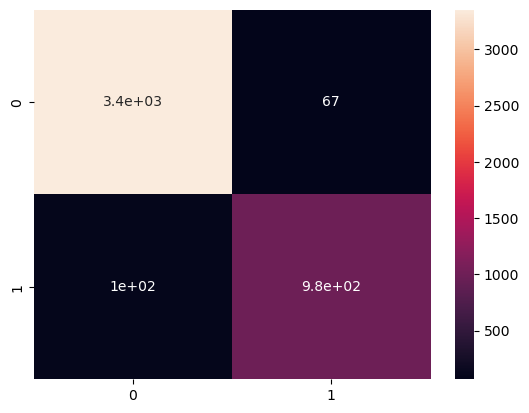

In [39]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

In [40]:
bag_model.predict([[-0.15495552, -0.23812581,  0.40870311]])

array([1], dtype=int64)

In [41]:
data[data['left']==0]


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,7,1
2001,0.82,0.67,2,202,3,0,0,0,7,1
2002,0.45,0.69,5,193,3,0,0,0,7,1
2003,0.78,0.82,5,247,3,0,0,0,7,1
2004,0.49,0.60,3,214,2,0,0,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,4,0
14207,0.74,0.95,5,266,10,0,0,1,4,0
14208,0.85,0.54,3,185,10,0,0,1,4,0
14209,0.33,0.65,3,172,10,0,0,1,5,0


In [42]:
features[2000]

array([-0.15032843,  0.04995109, -0.02061568])

In [43]:
bag_model.predict([[-0.15032843,  0.04995109, -0.02061568]])

array([0], dtype=int64)